#  PyTorch Lightning

__–ê–≤—Ç–æ—Ä –∑–∞–¥–∞—á: –ë–ª–æ—Ö–∏–Ω –ù.–í. (NVBlokhin@fa.ru)__

–ú–∞—Ç–µ—Ä–∏–∞–ª—ã: 
* https://lightning.ai/docs/pytorch/stable/starter/introduction.html
* https://lightning.ai/docs/pytorch/stable/levels/core_skills.html
* https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.core.LightningModule.html#lightning.pytorch.core.LightningModule.log
* https://lightning.ai/docs/pytorch/stable/extensions/logging.html
* https://lightning.ai/docs/pytorch/stable/common/progress_bar.html
* https://lightning.ai/docs/pytorch/stable/common/early_stopping.html
* https://lightning.ai/docs/pytorch/1.6.3/api/pytorch_lightning.utilities.model_summary.html#pytorch_lightning.utilities.model_summary.ModelSummary
* https://torchmetrics.readthedocs.io/en/stable/pages/lightning.html
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/
* https://www.youtube.com/watch?v=XbIN9LaQycQ&list=PLhhyoLH6IjfyL740PTuXef4TstxAK6nGP
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/data/datamodule.html

## –ó–∞–¥–∞—á–∏ –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–Ω–æ–≥–æ —Ä–∞–∑–±–æ—Ä–∞

1\. –°–æ–∑–¥–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ PyTorch Lightning.

In [1]:
!pip install pytorch_lightning

In [1]:
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import Any, List, Optional, Union
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    """
    –ö–ª–∞—Å—Å –º–æ–¥—É–ª—è PyTorch Lightning.

    –≠—Ç–æ—Ç –∫–ª–∞—Å—Å –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—É –º–æ–¥–µ–ª–∏, —à–∞–≥–∏ –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è,
    –∞ —Ç–∞–∫–∂–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
    """

    def __init__(self, n_inp, n_out):
        """–ó–¥–µ—Å—å –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏ –∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Å–ª–æ–∏."""
        super().__init__()
        self.fc = nn.Linear(n_inp,n_out)
        self.criterion = nn.CrossEntropyLoss()
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç –ø—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥ –º–æ–¥–µ–ª–∏.

        Args:
            x (torch.Tensor): –í—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä.

        Returns:
            torch.Tensor: –í—ã—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä –º–æ–¥–µ–ª–∏.
        """
        return self.fc(x)

    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        """
        –í—ã–ø–æ–ª–Ω—è–µ—Ç –æ–¥–∏–Ω —à–∞–≥ –æ–±—É—á–µ–Ω–∏—è.

        Args:
            batch (Any): –ë–∞—Ç—á –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
            batch_idx (int): –ò–Ω–¥–µ–∫—Å —Ç–µ–∫—É—â–µ–≥–æ –±–∞—Ç—á–∞.

        Returns:
            torch.Tensor: –ó–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –¥–ª—è —ç—Ç–æ–≥–æ —à–∞–≥–∞.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('train_loss', loss, True, True,True,True)
        return loss
        

    def validation_step(self, batch: Any, batch_idx: int) -> None:
        """
        –í—ã–ø–æ–ª–Ω—è–µ—Ç –æ–¥–∏–Ω —à–∞–≥ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

        Args:
            batch (Any): –ë–∞—Ç—á –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏.
            batch_idx (int): –ò–Ω–¥–µ–∫—Å —Ç–µ–∫—É—â–µ–≥–æ –±–∞—Ç—á–∞.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('val_loss', loss, True, True,True,True)
        return loss

    def test_step(self, batch: Any, batch_idx: int) -> None:
        """
        –í—ã–ø–æ–ª–Ω—è–µ—Ç –æ–¥–∏–Ω —à–∞–≥ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.

        Args:
            batch (Any): –ë–∞—Ç—á –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.
            batch_idx (int): –ò–Ω–¥–µ–∫—Å —Ç–µ–∫—É—â–µ–≥–æ –±–∞—Ç—á–∞.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('test_loss', loss, True, True,True,True)
        return loss

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

        Returns:
            torch.optim.Optimizer: –ù–∞—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä.
        """
        return optim.Adam(self.parameters(), lr=0.001)

In [2]:
# model = MyLightningModule(5,3)
# trainer = pl.Trainer(max_epochs=10,)
# trainer.fit(model,data)

In [3]:
class MyDataModule(pl.LightningDataModule):
    """
    –ö–ª–∞—Å—Å –º–æ–¥—É–ª—è –¥–∞–Ω–Ω—ã—Ö PyTorch Lightning.

    –≠—Ç–æ—Ç –∫–ª–∞—Å—Å –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –∑–∞–≥—Ä—É–∑–∫—É, –ø–æ–¥–≥–æ—Ç–æ–≤–∫—É –∏ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏.
    """

    def __init__(self):
        """
        –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç –º–æ–¥—É–ª—å –¥–∞–Ω–Ω—ã—Ö.

        Args:
            data_dir (str): –ü—É—Ç—å –∫ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ —Å –¥–∞–Ω–Ω—ã–º–∏.
        """
        super().__init__()

    def prepare_data(self) -> None:
        """
        –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

        –ó–¥–µ—Å—å –º–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–≥—Ä—É–∑–∫—É –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –¥—Ä—É–≥–∏–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç–µ–ª—å–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏.
        """
        pass

    def setup(self, stage: Optional[str] = None) -> None:
        """
        –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ (–æ–±—É—á–µ–Ω–∏–µ/–≤–∞–ª–∏–¥–∞—Ü–∏—è/—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ).

        Args:
            stage (Optional[str]): –≠—Ç–∞–ø, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è –º–µ—Ç–æ–¥ ("fit" –∏–ª–∏ "test").
        """

    def train_dataloader(self) -> DataLoader:
        """
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç DataLoader –¥–ª—è –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

        Returns:
            DataLoader: DataLoader —Å –æ–±—É—á–∞—é—â–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏.
        """

    def val_dataloader(self) -> DataLoader:
        """
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç DataLoader –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

        Returns:
            DataLoader: DataLoader —Å –¥–∞–Ω–Ω—ã–º–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.
        """
        

    def test_dataloader(self) -> DataLoader:
        """
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç DataLoader –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

        Returns:
            DataLoader: DataLoader —Å —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.
        """

## –ó–∞–¥–∞—á–∏ –¥–ª—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch as th
from tqdm.notebook import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchmetrics
import pytorch_lightning as pl

<p class="task" id="1"></p>

1\. –ó–∞–≥—Ä—É–∑–∏—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ `Walmart.csv`. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–ª–µ–¥—É—é—â—É—é –ø—Ä–æ—Ü–µ–¥—É—Ä—É –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
- –∑–∞–º–µ–Ω–∏—Ç–µ —Ü–µ–Ω—ã `Weekly_Sales` –Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º —Ü–µ–Ω—ã;
- —É–¥–∞–ª–∏—Ç–µ —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞—Ç–∞–º–∏;
- –∑–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ —Å—Ç–æ–ª–±—Ü—ã `Store` –∏ `Holiday_Flag` –ø—Ä–∏ –ø–æ–º–æ—â–∏ `TargetEncoder` (—Å–º. –ø–∞–∫–µ—Ç [category_encoders](https://contrib.scikit-learn.org/category_encoders/));
- –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤;
- —Ä–∞–∑–±–µ–π—Ç–µ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ.

–í—Å–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–æ–ø—É—Å–∫–∞–µ—Ç—Å—è –¥–µ–ª–∞—Ç—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ `numpy`, `pandas` –∏ `sklearn`.

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [5]:
df = pd.read_csv('Walmart.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [6]:
df = pd.read_csv('Walmart.csv')

df['Weekly_Sales'] = np.log1p(df['Weekly_Sales'])

df = df.drop('Date', axis=1)

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_features = ['Store', 'Holiday_Flag']
encoder = TargetEncoder(cols=categorical_features)

encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train, columns=X.columns).head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
0  1.315477      3.684569    -0.567131   -1.165268 -1.151924      0.938433
1  0.024362     -0.271402     0.259173    1.157092  1.361419     -1.238631
2 -1.800622     -0.271402     0.265141   -1.208963  1.003828     -0.819842
3  0.198987     -0.271402    -0.188431    1.069703 -0.928323     -0.098949
4  0.741406     -0.271402     1.414805    0.604357  1.380970     -0.889640

<p class="task" id="2"></p>

2\. –í —è—á–µ–π–∫–∞—Ö –Ω–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω —à–∞–±–ª–æ–Ω–Ω—ã–π –∫–æ–¥ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏. –í –¥–∞–Ω–Ω–æ–π –≤–µ—Ä—Å–∏–∏ –≤—Å–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–æ "—Å –Ω—É–ª—è": –æ–±—É—á–µ–Ω–∏–µ, –º–µ—Ç—Ä–∏–∫–∏, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è, –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ, –ª–æ–≥–∏–∫–∞ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏.

–ò—Å–ø–æ–ª—å–∑—É—è –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è, –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—è –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –¥–∏–Ω–∞–º–∏–∫—É –∏–∑–º–µ–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ –º–µ—Ç—Ä–∏–∫ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ. –ò–Ω—Ç–µ–≥—Ä–∏—Ä—É–π—Ç–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –≤ —Ü–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∏ –≤—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ.

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [8]:
def r2_score(y_true, y_pred):
    total_sum_squares = torch.sum((y_true - y_true.mean())**2)
    residual_sum_squares = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (residual_sum_squares / total_sum_squares)
    return r2

def mape_score(y_true, y_pred):
    return torch.mean(torch.abs((y_true - y_pred) / y_true)) * 100

In [9]:
class RegressionModel(nn.Module):
    def __init__(self, n_inputs, h_hidden):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = out.relu()
        out = self.fc2(out)
        return out

In [10]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [11]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    train_losses, val_losses = [], []
    train_r2s, val_r2s = [], []
    train_mapes, val_mapes = [], []
    
    for epoch in tqdm(range(num_epochs), desc ='Training model'):
        model.train()
        train_loss, train_r2, train_mape = 0.0, 0.0, 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_r2 += r2_score(targets, outputs).item()
            train_mape += mape_score(targets, outputs).item()
        
        train_loss /= len(train_loader)
        train_r2 /= len(train_loader)
        train_mape /= len(train_loader)
        train_losses.append(train_loss)
        train_r2s.append(train_r2)
        train_mapes.append(train_mape)
        
        model.eval()
        val_loss, val_r2, val_mape = 0.0, 0.0, 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs).flatten()
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_r2 += r2_score(targets, outputs).item()
                val_mape += mape_score(targets, outputs).item()
                
        val_loss /= len(val_loader)
        val_r2 /= len(val_loader)
        val_mape /= len(val_loader)
        val_losses.append(val_loss)
        val_r2s.append(val_r2)
        val_mapes.append(val_mape)
        
        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # –õ–æ–≥–∏–∫–∞ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞!")
            break
    
    return train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes

In [12]:
def plot_metrics(history):
    train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes = history
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(18, 5))
    
    # –ì—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    
    # –ì—Ä–∞—Ñ–∏–∫ R2
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_r2s, 'b-', label='Train R2')
    plt.plot(epochs, val_r2s, 'r-', label='Validation R2')
    plt.title('R2 Score vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    
    # –ì—Ä–∞—Ñ–∏–∫ MAPE
    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_mapes, 'b-', label='Train MAPE')
    plt.plot(epochs, val_mapes, 'r-', label='Validation MAPE')
    plt.title('MAPE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [13]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss, test_r2, test_mape = 0.0, 0.0, 0.0
    with th.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            test_r2 += r2_score(targets, outputs).item()
            test_mape += mape_score(targets, outputs).item()
            
    test_loss /= len(test_loader)
    test_r2 /= len(test_loader)
    test_mape /= len(test_loader)
    
    print("\n--- –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ ---")
    print(f"MSE: {test_loss:.4f}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"MAPE: {test_mape:.2f}%")

In [14]:
batch_size = 32
learning_rate = 0.01
patience = 5
num_epochs = 100
n_inputs = X_train.shape[1]
h_hidden = 128

Training model:   0%|          | 0/100 [00:00<?, ?it/s]

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞!


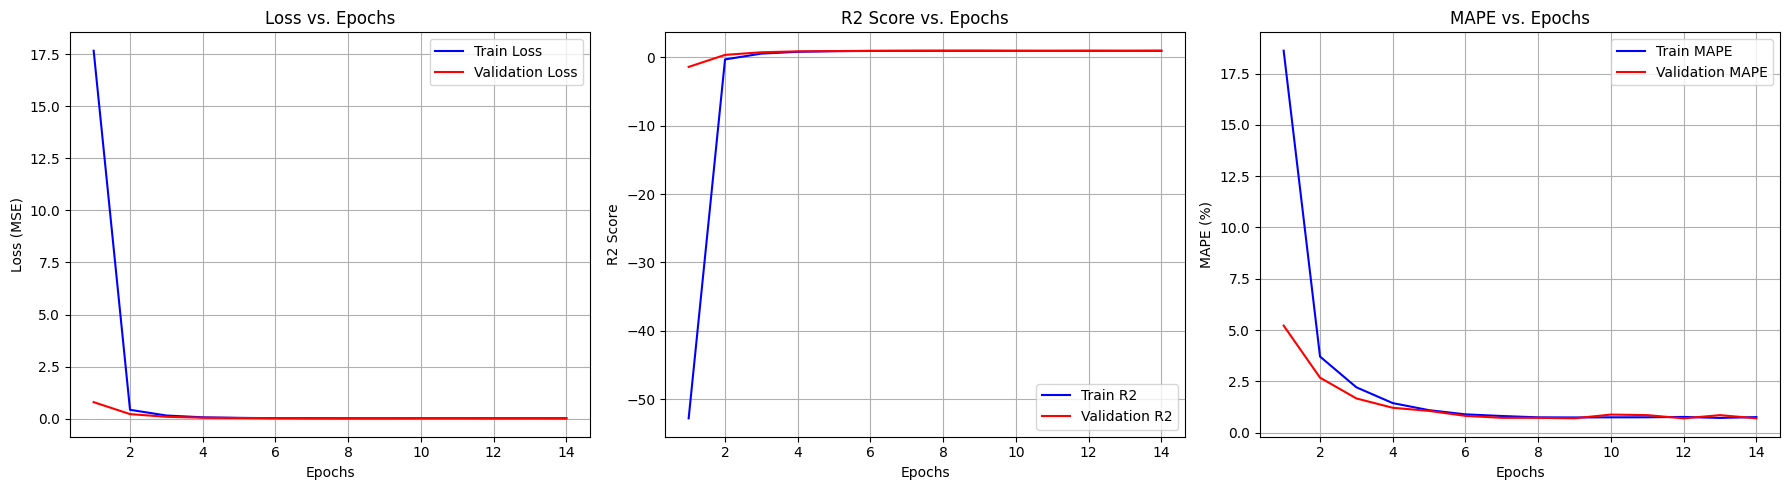


--- –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ ---
MSE: 0.0187
R2 Score: 0.9386
MAPE: 0.70%


In [15]:
X_train_tensor = th.tensor(X_train, dtype=th.float32)
y_train_tensor = th.tensor(y_train.values, dtype=th.float32)
X_val_tensor = th.tensor(X_val, dtype=th.float32)
y_val_tensor = th.tensor(y_val.values, dtype=th.float32)
X_test_tensor = th.tensor(X_test, dtype=th.float32)
y_test_tensor = th.tensor(y_test.values, dtype=th.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = RegressionModel(n_inputs=n_inputs, h_hidden=h_hidden)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience)

history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping)


plot_metrics(history)


evaluate_model(model, test_loader, criterion)

<p class="task" id="3"></p>

3\. –ü–µ—Ä–µ–ø–∏—à–∏—Ç–µ –ª–æ–≥–∏–∫—É –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, –∏—Å–ø–æ–ª—å–∑—É—è `pytorch_lightning`. –î–ª—è —Ä–∞—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫ $R^2$ –∏ MAPE –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `torchmetrics`. –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –≤ –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è. –ü–æ—Å–ª–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ.

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ progressbar —Ç–∞–∫, —á—Ç–æ:
* –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ –º–µ—Ç—Ä–∏–∫, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç–ø–æ—Ö–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —É—Å—Ä–µ–¥–Ω—è—é—Ç—Å—è;
* –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞ –≤–æ –≤—Ä–µ–º—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ –º–µ—Ç—Ä–∏–∫, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç–ø–æ—Ö–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —É—Å—Ä–µ–¥–Ω—è—é—Ç—Å—è.

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [18]:
class RegressionLightningModule(pl.LightningModule):
    """
    –ö–ª–∞—Å—Å LightningModule –¥–ª—è –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.
    """
    def __init__(self, n_inputs, h_hidden, learning_rate=0.001):
        super().__init__()
        self.save_hyperparameters()

        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
        
        self.criterion = nn.MSELoss()

        self.train_r2 = torchmetrics.R2Score()
        self.val_r2 = torchmetrics.R2Score()
        self.test_r2 = torchmetrics.R2Score()

        self.train_mape = torchmetrics.MeanAbsolutePercentageError()
        self.val_mape = torchmetrics.MeanAbsolutePercentageError()
        self.test_mape = torchmetrics.MeanAbsolutePercentageError()

    def forward(self, x):
        """–ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥"""
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out.flatten()

    def training_step(self, batch, batch_idx):
        """–û–¥–∏–Ω —à–∞–≥ –æ–±—É—á–µ–Ω–∏—è"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)
        
        self.train_r2(outputs, targets)
        self.train_mape(outputs, targets)
        
        # prog_bar=True –≤—ã–≤–æ–¥–∏—Ç –≤ progress bar
        # on_step=True - –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞, on_epoch=True - —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ –∑–∞ —ç–ø–æ—Ö—É
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_r2', self.train_r2, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_mape', self.train_mape, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        
        return loss

    def validation_step(self, batch, batch_idx):
        """–û–¥–∏–Ω —à–∞–≥ –≤–∞–ª–∏–¥–∞—Ü–∏–∏"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.val_r2(outputs, targets)
        self.val_mape(outputs, targets)

        self.log('val_loss', loss, prog_bar=True, logger=True)
        self.log('val_r2', self.val_r2, prog_bar=True, logger=True)
        self.log('val_mape', self.val_mape, prog_bar=True, logger=True)
        
        return loss

    def test_step(self, batch, batch_idx):
        """–û–¥–∏–Ω —à–∞–≥ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.test_r2(outputs, targets)
        self.test_mape(outputs, targets)

        self.log('test_loss', loss, logger=True)
        self.log('test_r2', self.test_r2, logger=True)
        self.log('test_mape', self.test_mape, logger=True)

        return loss

    def configure_optimizers(self):
        """–ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞"""
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        return optimizer

In [ ]:
n_inputs = X_train.shape[1]
model = RegressionLightningModule(n_inputs=n_inputs, h_hidden=h_hidden, learning_rate=learning_rate)
trainer = pl.Trainer(max_epochs=num_epochs)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_results = trainer.test(model, dataloaders=test_loader)

üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 5070 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         test_loss         ‚îÇ   0.022494886070489883    ‚îÇ
‚îÇ         test_mape         ‚îÇ    0.00879819318652153    ‚îÇ
‚îÇ          test_r2          ‚îÇ    0.9363046884536743     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<p class="task" id="4"></p>

4\. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∑–∞–¥–∞—á—É 3, –¥–æ–±–∞–≤–∏–≤ –ª–æ–≥–∏–∫—É —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏, –∏—Å–ø–æ–ª—å–∑—É—è callback `pytorch_lightning`. –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –Ω–µ —É–ª—É—á—à–∞–ª–æ—Å—å –≤ —Ç–µ—á–µ–Ω–∏–∏ 5 —ç–ø–æ—Ö, –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞.

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [17]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [18]:
early_stop_callback = EarlyStopping(
        monitor='val_loss',   # –ú–µ—Ç—Ä–∏–∫–∞ –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è
        patience=5,           # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è
        verbose=True,         # –ü–µ—á–∞—Ç–∞—Ç—å —Å–æ–æ–±—â–µ–Ω–∏–µ –ø—Ä–∏ –æ—Å—Ç–∞–Ω–æ–≤–∫–µ
        mode='min'            # 'min' - –∏—â–µ–º –º–∏–Ω–∏–º—É–º, 'max' - –º–∞–∫—Å–∏–º—É–º
    )

trainer = pl.Trainer(
    max_epochs=num_epochs,
    callbacks=[early_stop_callback]
)

model = RegressionLightningModule(n_inputs=n_inputs, h_hidden=h_hidden, learning_rate=learning_rate)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_results = trainer.test(model, dataloaders=test_loader)

üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | tes

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.806


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.560 >= min_delta = 0.0. New best score: 0.246


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.148 >= min_delta = 0.0. New best score: 0.098


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.048 >= min_delta = 0.0. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 0.031


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.026


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.016. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         test_loss         ‚îÇ   0.019153524190187454    ‚îÇ
‚îÇ         test_mape         ‚îÇ   0.007301097735762596    ‚îÇ
‚îÇ          test_r2          ‚îÇ    0.9457659125328064     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<p class="task" id="5"></p>

5\. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∑–∞–¥–∞—á—É 4, –æ—Ñ–æ—Ä–º–∏–≤ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –≤ –≤–∏–¥–µ `pytorch_lightning.LightningDataModule`. –í—Å—é –ª–æ–≥–∏–∫—É –ø–æ —Å–æ–∑–¥–∞–Ω–∏—é –¥–∞—Ç–∞—Å–µ—Ç–∞ (–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Ä–∞–∑–±–∏–µ–Ω–∏–µ –∏ —Ç.–¥.) –∑–∞–ø–∞–∫—É–π—Ç–µ –≤ –º–µ—Ç–æ–¥ `setup`. 

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [15]:
class WalmartDataModule(pl.LightningDataModule):
    """
    LightningDataModule –¥–ª—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö Walmart.
    –ò–Ω–∫–∞–ø—Å—É–ª–∏—Ä—É–µ—Ç –≤—Å–µ —à–∞–≥–∏ –ø–æ –∑–∞–≥—Ä—É–∑–∫–µ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö.
    """
    def __init__(self, data_path: str = 'Walmart.csv', batch_size: int = 32):
        super().__init__()
        self.data_path = data_path
        self.batch_size = batch_size
        self.encoder = TargetEncoder(cols=['Store', 'Holiday_Flag'])
        self.scaler = StandardScaler()

    def setup(self, stage: str):
        """
        –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ GPU/–ø—Ä–æ—Ü–µ—Å—Å–∞.
        –ó–¥–µ—Å—å –º—ã –∑–∞–≥—Ä—É–∂–∞–µ–º, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏ —Ä–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ.
        """
        df = pd.read_csv(self.data_path)
        df['Weekly_Sales'] = np.log1p(df['Weekly_Sales'])
        df = df.drop('Date', axis=1)

        X = df.drop('Weekly_Sales', axis=1)
        y = df['Weekly_Sales']

        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        self.encoder.fit(X_train, y_train)
        X_train = self.encoder.transform(X_train)
        self.scaler.fit(X_train)
        X_train = self.scaler.transform(X_train)

        X_val = self.encoder.transform(X_val)
        X_val = self.scaler.transform(X_val)
        X_test = self.encoder.transform(X_test)
        X_test = self.scaler.transform(X_test)
        
        self.n_inputs = X_train.shape[1]

        if stage == 'fit' or stage is None:
            self.train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
            self.val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
        
        if stage == 'test' or stage is None:
            self.test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
        
        print("DataModule setup complete.")

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

In [20]:
data_module = WalmartDataModule(data_path='Walmart.csv', batch_size=32)

model = RegressionLightningModule(
    n_inputs=6, 
    h_hidden=128, 
    learning_rate=0.001
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode='min',
    # min_delta = 1e-2
    )

trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback]
)
trainer.fit(model, datamodule=data_module)
test_results = trainer.test(model, datamodule=data_module)

üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | tes

DataModule setup complete.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 45.211


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 41.324 >= min_delta = 0.0. New best score: 3.887


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.027 >= min_delta = 0.0. New best score: 2.860


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.607 >= min_delta = 0.0. New best score: 2.253


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.429 >= min_delta = 0.0. New best score: 1.824


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.317 >= min_delta = 0.0. New best score: 1.507


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.272 >= min_delta = 0.0. New best score: 1.234


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.203 >= min_delta = 0.0. New best score: 1.031


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.204 >= min_delta = 0.0. New best score: 0.827


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.153 >= min_delta = 0.0. New best score: 0.674


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.119 >= min_delta = 0.0. New best score: 0.555


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 0.456


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 0.381


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.069 >= min_delta = 0.0. New best score: 0.312


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.056 >= min_delta = 0.0. New best score: 0.256


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 0.213


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.041 >= min_delta = 0.0. New best score: 0.172


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 0.141


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.116


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 0.100


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 0.082


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 0.071


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.062


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.055


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.052


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.046


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.041


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.038


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.036


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.033


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.028


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.026


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.025


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.022


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.015


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.015


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.015. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DataModule setup complete.


c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         test_loss         ‚îÇ   0.016698742285370827    ‚îÇ
‚îÇ         test_mape         ‚îÇ   0.006435705348849297    ‚îÇ
‚îÇ          test_r2          ‚îÇ    0.9527167081832886     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<p class="task" id="6"></p>

6\. –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∑–∞–¥–∞—á—É 5, –¥–æ–±–∞–≤–∏–≤ –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ `mlflow` –∏–ª–∏ –ª—é–±–æ–≥–æ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, —Å –∫–æ—Ç–æ—Ä—ã–º `lightning` —É–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å. 

–í—Å—Ç–∞–≤—å—Ç–µ –≤ —Ç–µ–∫—Å—Ç–æ–≤—É—é —è—á–µ–π–∫—É —Å–∫—Ä–∏–Ω—à–æ—Ç—ã, –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—â–∏–µ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —Å–æ –≤—Å–µ–º–∏ –Ω—É–∂–Ω—ã–º–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è–º–∏.

- [ ] –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ –Ω–∞ —Å–µ–º–∏–Ω–∞—Ä–µ

In [42]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import MLFlowLogger 
import mlflow
import subprocess
import os
import sys
from IPython.display import Image

from playwright.sync_api import sync_playwright

def run_screenshot_script(url, output_path, width=1920, height=1480):
	"""
	–î–µ–ª–∞–µ—Ç —Å–∫—Ä–∏–Ω—à–æ—Ç, –∑–∞–ø—É—Å–∫–∞—è Playwright –≤ –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –ø–æ–¥–ø—Ä–æ—Ü–µ—Å—Å–µ,
	—á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–≤ asyncio, –Ω–µ —Ç—Ä–µ–±—É—è –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ñ–∞–π–ª–∞ —Å–∫—Ä–∏–ø—Ç–∞.
	"""
	script_code = """
import sys
import time
from playwright.sync_api import sync_playwright

def take_screenshot(url, output_path, width, height):
	'''
	–ó–∞–ø—É—Å–∫–∞–µ—Ç –±—Ä–∞—É–∑–µ—Ä, –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç –ø–æ URL –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Å–∫—Ä–∏–Ω—à–æ—Ç.
	'''
	try:
		with sync_playwright() as p:
			browser = p.chromium.launch()
			page = browser.new_page()
			page.set_viewport_size({"width": int(width), "height": int(height)})
			page.goto(url)
			time.sleep(5)  # –î–∞–µ–º –≤—Ä–µ–º—è –Ω–∞ –ø—Ä–æ–≥—Ä—É–∑–∫—É JS
			page.screenshot(path=output_path)
			browser.close()
		print(f"Picture succesfully saved in {output_path}")
	except Exception as e:
		print(f"Error occured in Playwright subprocess: {e}", file=sys.stderr)
		sys.exit(1)

if __name__ == "__main__":
	script_url = sys.argv[1]
	script_output_path = sys.argv[2]
	script_width = sys.argv[3]
	script_height = sys.argv[4]

	take_screenshot(script_url, script_output_path, script_width, script_height)
"""
	python_executable = sys.executable
	command = [
		python_executable,
		"-c",
		script_code,
		url,
		output_path,
		str(width),
		str(height)
	]

	try:
		result = subprocess.run(
			command,
			capture_output=True,
			text=True,
			check=True
		)

		if result.stdout:
			print(result.stdout.strip())

		if result.stderr:
			print("–°–æ–æ–±—â–µ–Ω–∏—è –∏–∑ –ø–æ—Ç–æ–∫–∞ –æ—à–∏–±–æ–∫:", result.stderr.strip(), file=sys.stderr)

	except subprocess.CalledProcessError as e:
		print("–û—à–∏–±–∫–∞: –Ω–µ —É–¥–∞–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å–∫—Ä–∏–ø—Ç —Å–∫—Ä–∏–Ω—à–æ—Ç–∞.", file=sys.stderr)
		print(f"–ö–æ–¥ –≤–æ–∑–≤—Ä–∞—Ç–∞: {e.returncode}", file=sys.stderr)
		print(f"Stdout:\n{e.stdout}", file=sys.stderr)
		print(f"Stderr:\n{e.stderr}", file=sys.stderr)
	except FileNotFoundError:
		print(f"–û—à–∏–±–∫–∞: –Ω–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ '{python_executable}'. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ Python —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –∏ –¥–æ—Å—Ç—É–ø–µ–Ω.", file=sys.stderr)

In [44]:
if 'mlflow_process' in locals() and mlflow_process.poll() is None:
    mlflow_process.terminate()
    mlflow_process.wait()
    print("–û—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø—Ä–æ—Ü–µ—Å—Å MLflow UI.")

In [45]:
port = 5000
mlflow_process = subprocess.Popen(["mlflow", "ui", "--port", str(port)])
print(f"MLflow UI –∑–∞–ø—É—â–µ–Ω —Å PID (ID –ø—Ä–æ—Ü–µ—Å—Å–∞): {mlflow_process.pid}")
mlflow_url = f"http://localhost:{port}"
mlflow.set_tracking_uri("file:./mlruns")
print(mlflow_url)

MLflow UI –∑–∞–ø—É—â–µ–Ω —Å PID (ID –ø—Ä–æ—Ü–µ—Å—Å–∞): 32836
http://localhost:5000


üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | tes

DataModule setup complete.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 54.013


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 50.220 >= min_delta = 0.0. New best score: 3.793


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.110 >= min_delta = 0.0. New best score: 2.683


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.638 >= min_delta = 0.0. New best score: 2.045


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.420 >= min_delta = 0.0. New best score: 1.626


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.318 >= min_delta = 0.0. New best score: 1.308


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.236 >= min_delta = 0.0. New best score: 1.072


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.185 >= min_delta = 0.0. New best score: 0.888


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.153 >= min_delta = 0.0. New best score: 0.735


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.117 >= min_delta = 0.0. New best score: 0.618


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.103 >= min_delta = 0.0. New best score: 0.515


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.088 >= min_delta = 0.0. New best score: 0.427


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.077 >= min_delta = 0.0. New best score: 0.350


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.063 >= min_delta = 0.0. New best score: 0.287


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.053 >= min_delta = 0.0. New best score: 0.234


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.044 >= min_delta = 0.0. New best score: 0.190


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.035 >= min_delta = 0.0. New best score: 0.156


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.130


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.108


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 0.090


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.076


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.066


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.058


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.051


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.045


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.041


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.037


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.036


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.031


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.029


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.029


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.026


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.025


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.022


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.015


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.015


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.015. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DataModule setup complete.


c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ         test_loss         ‚îÇ    0.01535725872963667    ‚îÇ
‚îÇ         test_mape         ‚îÇ    0.0062479586340487     ‚îÇ
‚îÇ          test_r2          ‚îÇ    0.9565151929855347     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Picture succesfully saved in images/run_fe3e5be86a144bfa8419c7aa7de74b72_metrics.png


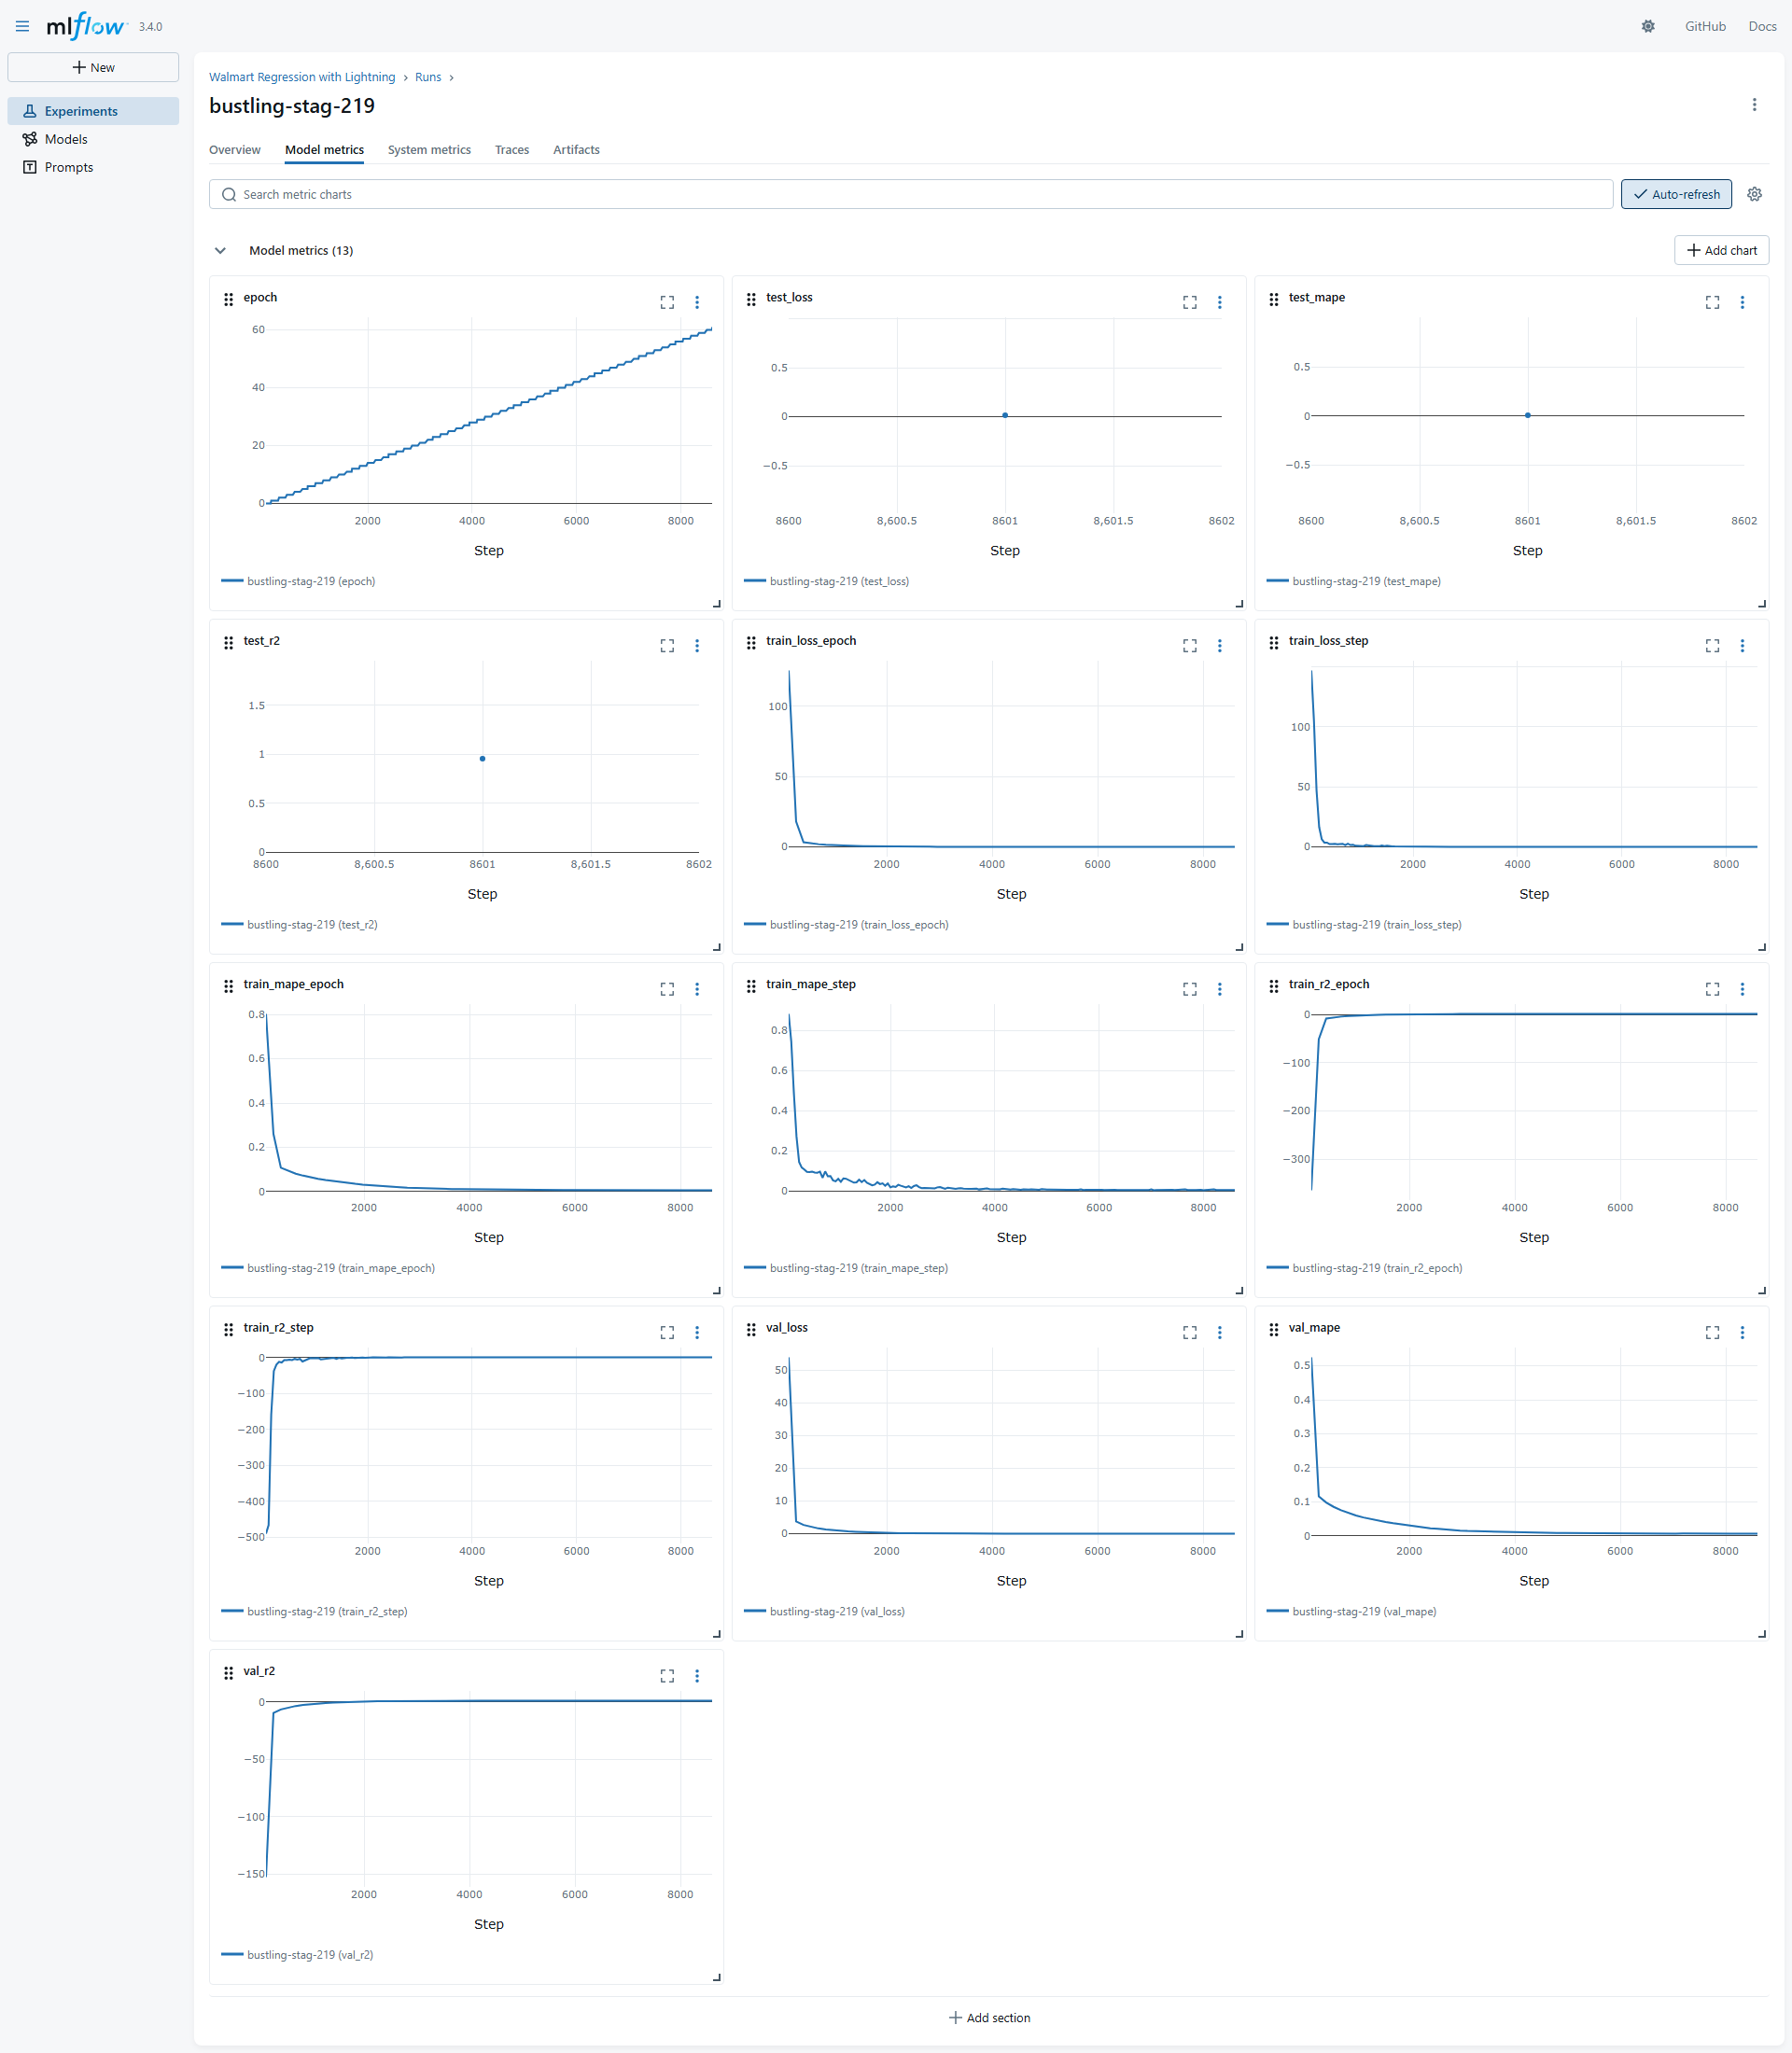

In [49]:
experiment_name = "Walmart Regression with Lightning"    
mlflow_logger = MLFlowLogger(
    experiment_name=experiment_name,
    tracking_uri="file:./mlruns"
)
    
data_module = WalmartDataModule(data_path='Walmart.csv', batch_size=32)

model = RegressionLightningModule(
    n_inputs=6, 
    h_hidden=128, 
    learning_rate=0.001
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode='min',
    # min_delta = 1e-2
)
    
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback],
    logger=mlflow_logger
)
    
trainer.fit(model, datamodule=data_module)
trainer.test(model, datamodule=data_module)

run_id = trainer.logger.run_id
experiment_id = trainer.logger.experiment_id

run_url = f"http://localhost:{port}/#/experiments/{experiment_id}/runs/{run_id}"
screenshot_path = f"images/run_{run_url.split('/')[-1]}_metrics.png"

try:
    run_screenshot_script(run_url+ "/model-metrics", screenshot_path,1920,2200)
    display(Image(filename=screenshot_path))
except Exception as e:
    print(f"Failed to generate or display the screenshot: {e}")

mlflow.end_run()